In [15]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gr_books.csv")
df

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony
...,...,...,...,...,...,...,...,...
2377,2446,"Ralph Roberts, a sus setenta años y tras la mu...",NaN,Stephen King,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.82,Insomnia
2378,2447,Murder at the Vicarage marks the debut of Agat...,NaN,Agatha Christie,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Murder at the Vicarage
2379,2448,In 1951 John Wyndham published his novel The D...,NaN,John Wyndham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.02,The Day of the Triffids
2380,2449,This now classic book revealed Flannery O'Conn...,NaN,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.22,A Good Man is Hard to Find and Other Stories


## Cleaning

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [5]:
df.head()

,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [26]:
df

,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony
...,...,...,...,...,...,...
2377,"Ralph Roberts, a sus setenta años y tras la mu...",Stephen King,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.82,Insomnia
2378,Murder at the Vicarage marks the debut of Agat...,Agatha Christie,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Murder at the Vicarage
2379,In 1951 John Wyndham published his novel The D...,John Wyndham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.02,The Day of the Triffids
2380,This now classic book revealed Flannery O'Conn...,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.22,A Good Man is Hard to Find and Other Stories


## EDA

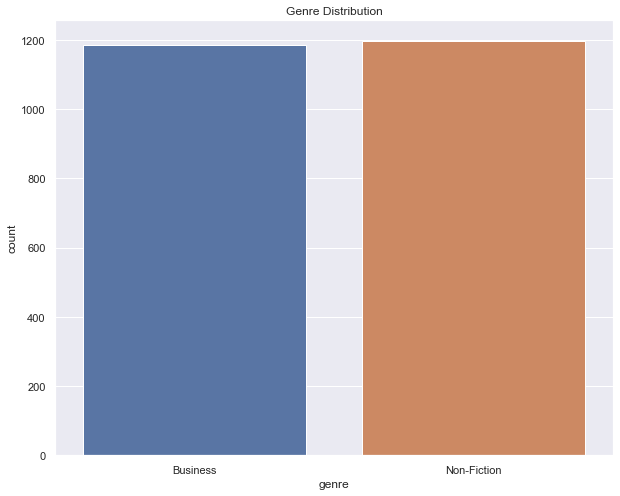

In [42]:
plt.figure(figsize=(10,8))
plt.title('Genre Distribution')
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'genre', data = df)

In [49]:
books = df['title'].value_counts()[:25]
rating = df.rating[:25]
print(books)

The Fountainhead                                                                                                                   2
The Startup Way: Making Entrepreneurship a Fundamental Discipline of Every Enterprise                                              2
Inferno                                                                                                                            2
Atlas Shrugged                                                                                                                     2
The Connected Company                                                                                                              1
Dare to Lead                                                                                                                       1
The Eyre Affair                                                                                                                    1
The Toilet Paper Entrepreneur: The Tell-It-Like-It-Is Guide to Cleani

C:\Users\etc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


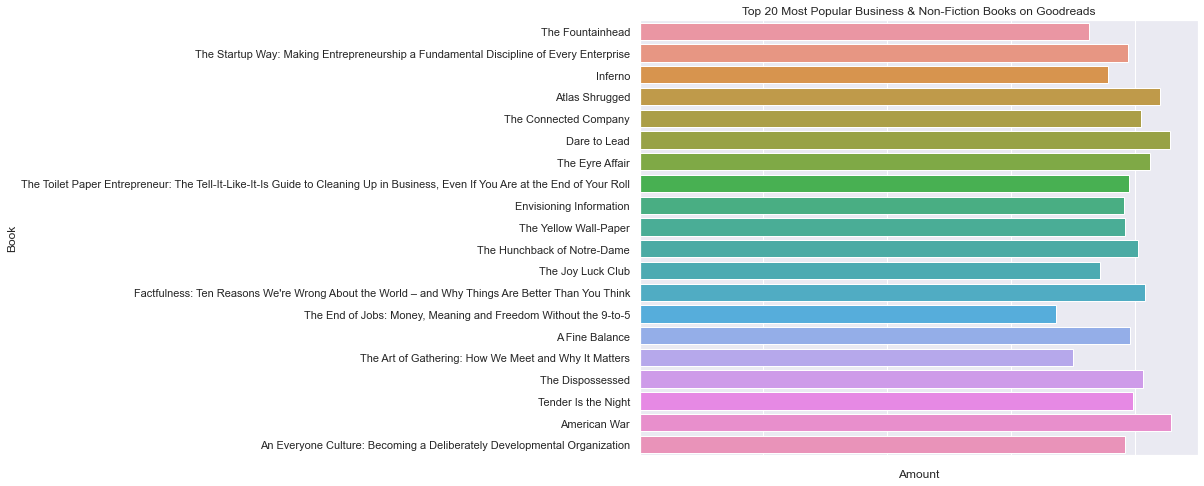

In [52]:
books = df['title'].value_counts()[:20]
                                   
rating = df.rating[:20]

plt.figure(figsize=(10,8))
           
bar = sns.barplot(x = rating, y = books.index)

bar.set_xticklabels(bar.get_xticklabels(), rotation=30)

plt.title('Top 20 Most Popular Business & Non-Fiction Books on Goodreads')
plt.xlabel('Amount')
plt.ylabel('Book')
plt.show()

## Preprocessing and Modeling 

In [21]:
#this code was sourced by: https://towardsdatascience.com/building-a-content-based-book-recommendation-engine-9fd4d57a4da

def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'image_link']].iloc[movie_indices]
       
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['image_link']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


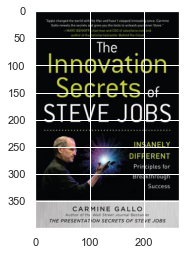

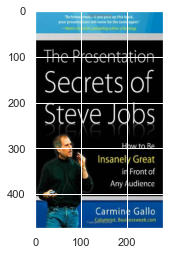

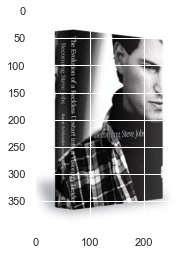

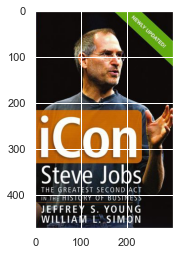

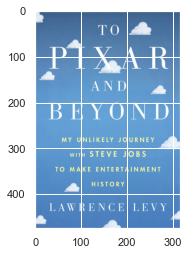

In [22]:
recommend('Steve Jobs', "Business")

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


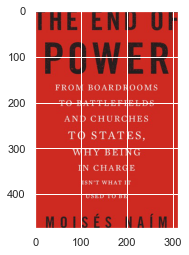

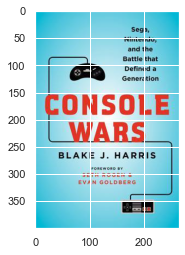

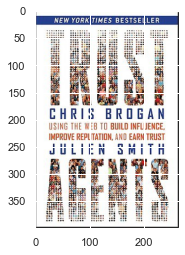

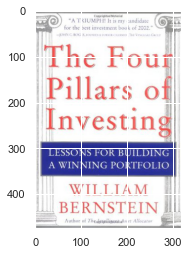

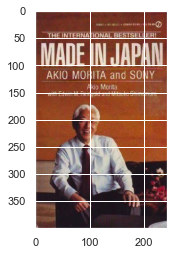

In [32]:
recommend('When to Rob a Bank', 'Business')

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


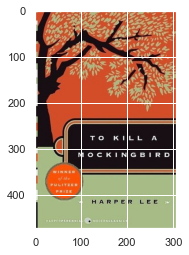

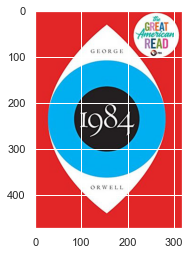

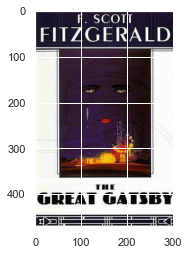

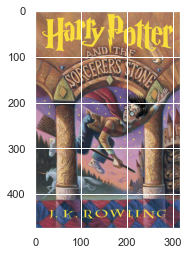

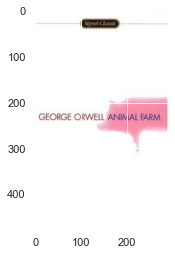

In [33]:
recommend('Life of Pi', 'Non-Fiction')

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


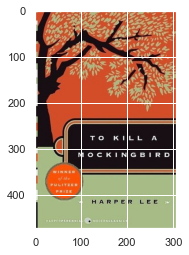

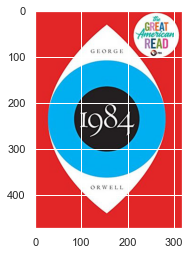

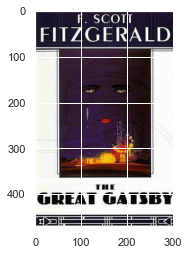

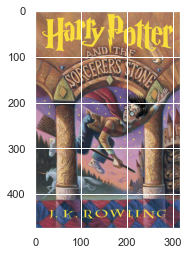

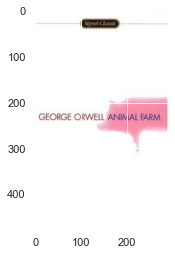

In [34]:
recommend('The Starless Sea', 'Non-Fiction')

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


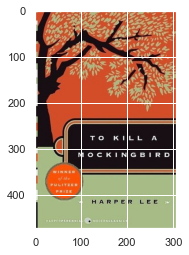

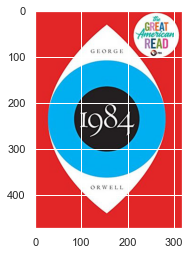

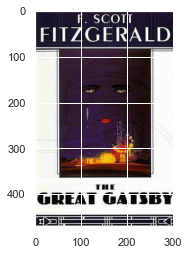

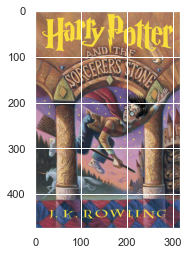

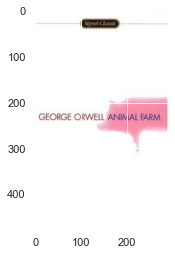

In [38]:
recommend('A Gentleman in Moscow', 'Non-Fiction')

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


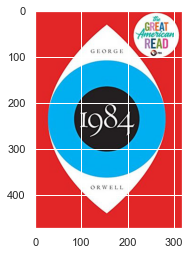

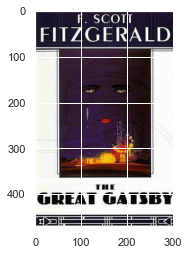

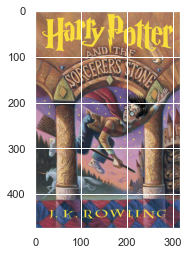

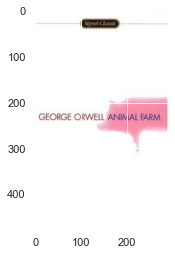

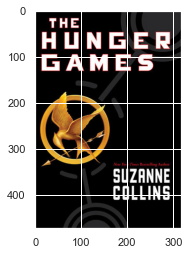

In [39]:
recommend('Insomnia', 'Non-Fiction')

In [ ]:
# source:
# https://towardsdatascience.com/building-a-content-based-book-recommendation-engine-9fd4d57a4da